In [2]:
Download from Kaggle: "Medical Appointment No Shows"
URL: https://www.kaggle.com/datasets/joniarroba/noshowappointments


SyntaxError: invalid syntax (2476712764.py, line 1)

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


np.random.seed(42)
n_records = 10000

data = {
    'PatientID': range(1, n_records + 1),
    'AppointmentID': range(10000, 10000 + n_records),
    'Gender': np.random.choice(['M', 'F'], n_records),
    'Age': np.random.randint(0, 90, n_records),
    'ScheduledDay': pd.date_range('2024-01-01', periods=n_records, freq='H'),
    'AppointmentDay': pd.date_range('2024-01-02', periods=n_records, freq='2H'),
    'Neighbourhood': np.random.choice(['Area_A', 'Area_B', 'Area_C', 'Area_D'], n_records),
    'SMS_received': np.random.choice([0, 1], n_records, p=[0.3, 0.7]),
    'Scholarship': np.random.choice([0, 1], n_records, p=[0.9, 0.1]),
    'Hypertension': np.random.choice([0, 1], n_records, p=[0.8, 0.2]),
    'Diabetes': np.random.choice([0, 1], n_records, p=[0.85, 0.15]),
    'Alcoholism': np.random.choice([0, 1], n_records, p=[0.95, 0.05]),
    'Handicap': np.random.randint(0, 5, n_records),
    'No-show': np.random.choice(['Yes', 'No'], n_records, p=[0.2, 0.8])
}

df = pd.DataFrame(data)
df.to_csv('appointment_data.csv', index=False)
print("Sample data created!")


C:\Users\harin\AppData\Local\Temp\ipykernel_30476\2806296447.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'ScheduledDay': pd.date_range('2024-01-01', periods=n_records, freq='H'),
C:\Users\harin\AppData\Local\Temp\ipykernel_30476\2806296447.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'AppointmentDay': pd.date_range('2024-01-02', periods=n_records, freq='2H'),


Sample data created!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('appointment_data.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (10000, 14)

First 5 rows:
   PatientID  AppointmentID Gender  Age         ScheduledDay  \
0          1          10000      M   50  2024-01-01 00:00:00   
1          2          10001      F   70  2024-01-01 01:00:00   
2          3          10002      M   47  2024-01-01 02:00:00   
3          4          10003      M   18  2024-01-01 03:00:00   
4          5          10004      M    5  2024-01-01 04:00:00   

        AppointmentDay Neighbourhood  SMS_received  Scholarship  Hypertension  \
0  2024-01-02 00:00:00        Area_C             1            0             0   
1  2024-01-02 02:00:00        Area_C             1            0             0   
2  2024-01-02 04:00:00        Area_B             1            0             0   
3  2024-01-02 06:00:00        Area_B             1            0             1   
4  2024-01-02 08:00:00        Area_D             1            0             0   

   Diabetes  Alcoholism  Handicap No-show  
0         0           0         4      No 

In [6]:
df = df.drop_duplicates()
df = df.dropna()
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['NoShow_Binary'] = df['No-show'].map({'Yes': 1, 'No': 0})

df = df[df['Age'] >= 0]
df = df[df['Age'] <= 110]

print(f"\nCleaned dataset shape: {df.shape}")
print(f"No-show rate: {df['NoShow_Binary'].mean():.2%}")



Cleaned dataset shape: (10000, 15)
No-show rate: 19.64%


In [7]:

df['DaysInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


df['AppointmentMonth'] = df['AppointmentDay'].dt.month
df['AppointmentWeekday'] = df['AppointmentDay'].dt.dayofweek  # 0=Monday, 6=Sunday
df['AppointmentHour'] = df['AppointmentDay'].dt.hour


df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 120], 
                         labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

df['SameDayAppointment'] = (df['DaysInAdvance'] == 0).astype(int)


df['TotalConditions'] = df['Hypertension'] + df['Diabetes'] + df['Alcoholism']

print("\nNew Features Created:")
print(df[['DaysInAdvance', 'AppointmentWeekday', 'AgeGroup', 'TotalConditions']].head())



New Features Created:
   DaysInAdvance  AppointmentWeekday AgeGroup  TotalConditions
0              1                   1    Adult                0
1              1                   1  Elderly                0
2              1                   1    Adult                0
3              1                   1    Child                2
4              1                   1    Child                0


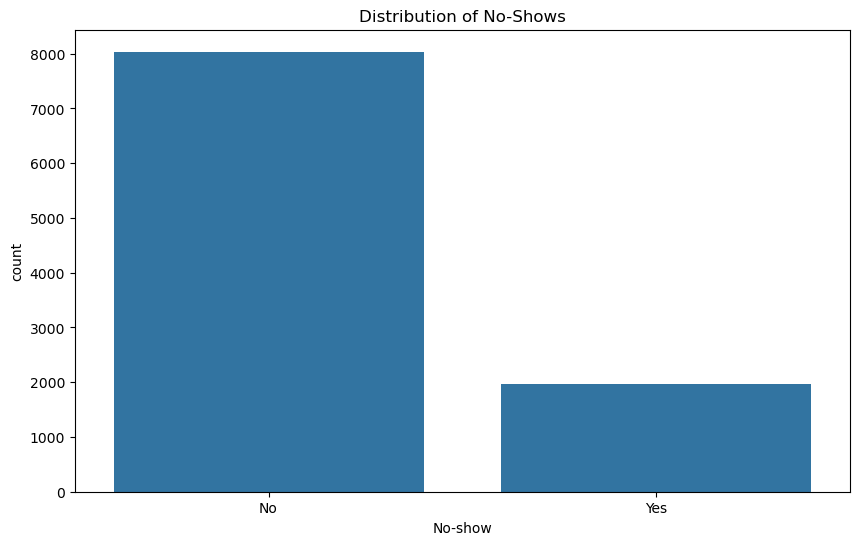

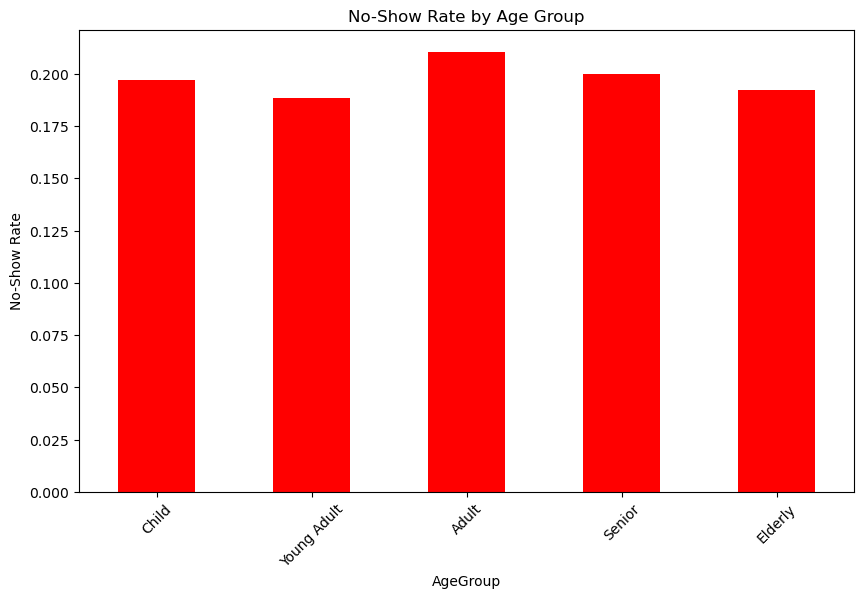

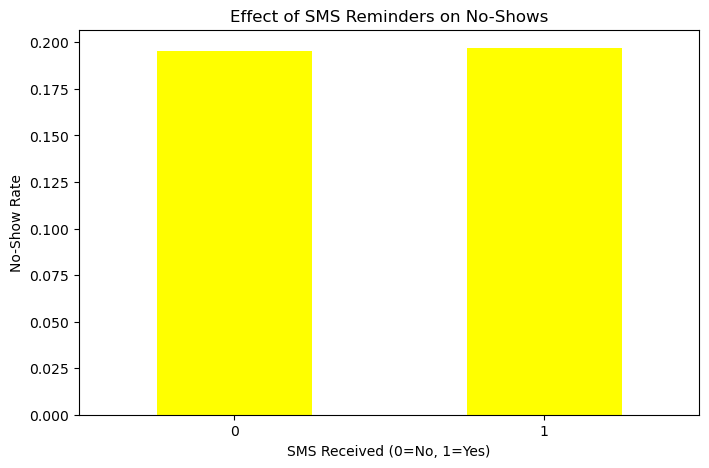

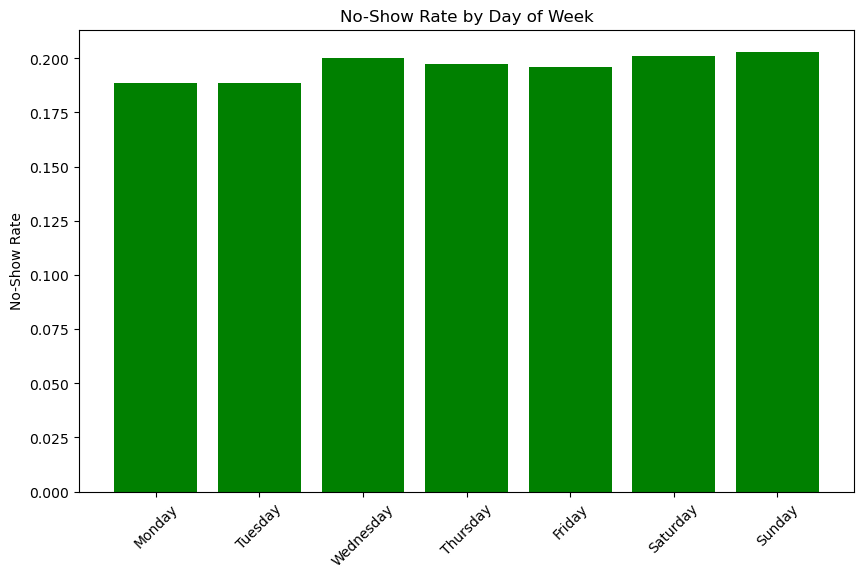

<Figure size 1000x600 with 0 Axes>

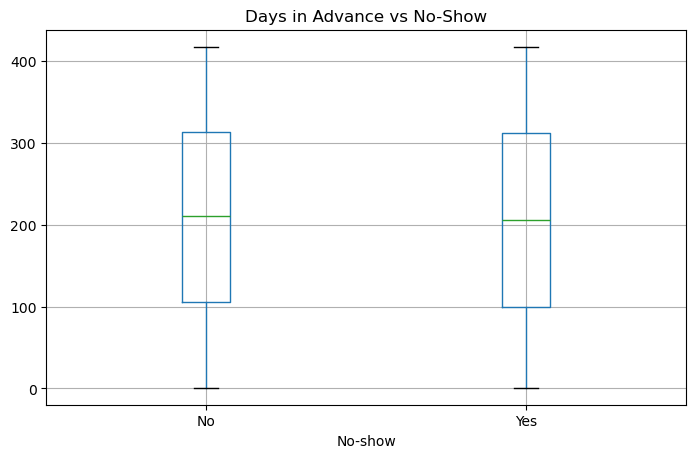


Key Insights:
No-show rate when SMS sent: 19.69%
No-show rate when SMS NOT sent: 19.52%

Average days in advance - Showed: 209.5
Average days in advance - No-show: 206.1


In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='No-show')
plt.title('Distribution of No-Shows')
plt.savefig('noshow_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
noshow_by_age = df.groupby('AgeGroup')['NoShow_Binary'].mean()
noshow_by_age.plot(kind='bar', color='Red')
plt.title('No-Show Rate by Age Group')
plt.ylabel('No-Show Rate')
plt.xticks(rotation=45)
plt.savefig('noshow_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 5))
sms_effect = df.groupby('SMS_received')['NoShow_Binary'].mean()
sms_effect.plot(kind='bar', color='Yellow')
plt.title('Effect of SMS Reminders on No-Shows')
plt.xlabel('SMS Received (0=No, 1=Yes)')
plt.ylabel('No-Show Rate')
plt.xticks(rotation=0)
plt.savefig('sms_effect.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
noshow_by_day = df.groupby('AppointmentWeekday')['NoShow_Binary'].mean()
plt.bar(range(7), noshow_by_day.values, color='Green')
plt.xticks(range(7), day_names, rotation=45)
plt.title('No-Show Rate by Day of Week')
plt.ylabel('No-Show Rate')
plt.savefig('noshow_by_weekday.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(10, 6))
df.boxplot(column='DaysInAdvance', by='No-show', figsize=(8, 5))
plt.title('Days in Advance vs No-Show')
plt.suptitle('')
plt.savefig('days_advance_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insights:")
print(f"No-show rate when SMS sent: {df[df['SMS_received']==1]['NoShow_Binary'].mean():.2%}")
print(f"No-show rate when SMS NOT sent: {df[df['SMS_received']==0]['NoShow_Binary'].mean():.2%}")
print(f"\nAverage days in advance - Showed: {df[df['NoShow_Binary']==0]['DaysInAdvance'].mean():.1f}")
print(f"Average days in advance - No-show: {df[df['NoShow_Binary']==1]['DaysInAdvance'].mean():.1f}")


In [8]:
feature_columns = [
    'Age', 'Gender', 'SMS_received', 'DaysInAdvance',
    'AppointmentWeekday', 'Scholarship', 'Hypertension',
    'Diabetes', 'Alcoholism', 'Handicap', 'TotalConditions'
]


le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

feature_columns_final = [
    'Age', 'Gender_Encoded', 'SMS_received', 'DaysInAdvance',
    'AppointmentWeekday', 'Scholarship', 'Hypertension',
    'Diabetes', 'Alcoholism', 'Handicap', 'TotalConditions'
]

X = df[feature_columns_final]
y = df['NoShow_Binary']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"No-show rate in training: {y_train.mean():.2%}")
print(f"No-show rate in test: {y_test.mean():.2%}")


Training set size: 8000
Test set size: 2000
No-show rate in training: 19.64%
No-show rate in test: 19.65%


In [9]:

dt_model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    class_weight='balanced'  
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [9]:

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Showed Up', 'No-Show']))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Showed Up', 'No-Show'],
            yticklabels=['Showed Up', 'No-Show'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


feature_importance = pd.DataFrame({
    'Feature': feature_columns_final,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Predicting No-Shows')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())


NameError: name 'y_pred' is not defined

In [11]:

results_df = df[['PatientID', 'AppointmentID', 'Age', 'Gender', 'AppointmentDay', 
                 'Neighbourhood', 'SMS_received', 'DaysInAdvance', 
                 'AppointmentWeekday', 'No-show', 'NoShow_Binary']].copy()


results_df['PredictedNoShow'] = dt_model.predict(X)
results_df['NoShowProbability'] = dt_model.predict_proba(X)[:, 1]
results_df['RiskLevel'] = pd.cut(results_df['NoShowProbability'], 
                                  bins=[0, 0.3, 0.6, 1.0],
                                  labels=['Low Risk', 'Medium Risk', 'High Risk'])


results_df.to_csv('appointment_predictions.csv', index=False)
print("✅ Predictions exported to 'appointment_predictions.csv'")

summary_stats = pd.DataFrame({
    'Metric': ['Total Appointments', 'Actual No-Shows', 'Predicted No-Shows', 
               'Model Accuracy', 'Average No-Show Rate'],
    'Value': [len(df), 
              df['NoShow_Binary'].sum(),
              results_df['PredictedNoShow'].sum(),
              accuracy,
              df['NoShow_Binary'].mean()]
})
summary_stats.to_csv('summary_statistics.csv', index=False)
print("✅ Summary statistics exported")


feature_importance.to_csv('feature_importance.csv', index=False)
print("✅ Feature importance exported")


✅ Predictions exported to 'appointment_predictions.csv'
✅ Summary statistics exported
✅ Feature importance exported


In [10]:

print("=" * 60)
print("OPTIMIZATION RECOMMENDATIONS REPORT")
print("=" * 60)


sms_impact = df.groupby('SMS_received')['NoShow_Binary'].agg(['mean', 'count'])
print("\n1. SMS REMINDER STRATEGY")
print(f"   No-show rate WITHOUT SMS: {sms_impact.loc[0, 'mean']:.2%}")
print(f"   No-show rate WITH SMS: {sms_impact.loc[1, 'mean']:.2%}")
print(f"   💡 Recommendation: Increase SMS reminder coverage to reduce no-shows")


day_analysis = df.groupby('AppointmentWeekday')['NoShow_Binary'].mean()
best_days = day_analysis.nsmallest(2).index.tolist()
worst_days = day_analysis.nlargest(2).index.tolist()
print("\n2. OPTIMAL SCHEDULING DAYS")
print(f"   Best days (lowest no-show): {[day_names[d] for d in best_days]}")
print(f"   Worst days (highest no-show): {[day_names[d] for d in worst_days]}")
print(f"   💡 Recommendation: Schedule high-risk patients on {day_names[best_days[0]]}")


advance_analysis = df.groupby(pd.cut(df['DaysInAdvance'], bins=[0, 7, 14, 30, 365]))['NoShow_Binary'].mean()
print("\n3. BOOKING WINDOW OPTIMIZATION")
print("   No-show rate by advance booking:")
for interval, rate in advance_analysis.items():
    print(f"   {interval}: {rate:.2%}")
print(f"   💡 Recommendation: Minimize booking windows beyond 14 days")


high_risk = results_df[results_df['RiskLevel'] == 'High Risk']
print("\n4. HIGH-RISK PATIENT INTERVENTION")
print(f"   Number of high-risk appointments: {len(high_risk)}")
print(f"   Potential no-shows prevented with intervention: {int(len(high_risk) * 0.3)}")
print(f"   💡 Recommendation: Implement reminder calls for high-risk patients")

age_group_noshow = df.groupby('AgeGroup')['NoShow_Binary'].mean()
print("\n5. AGE-GROUP TARGETED APPROACH")
for age_group, rate in age_group_noshow.items():
    print(f"   {age_group}: {rate:.2%}")
highest_risk_age = age_group_noshow.idxmax()
print(f"   💡 Recommendation: Focus on {highest_risk_age} group with tailored reminders")


with open('optimization_recommendations.txt', 'w') as f:
    f.write(recommendations)

print("\n✅ Recommendations saved to 'optimization_recommendations.txt'")


OPTIMIZATION RECOMMENDATIONS REPORT

1. SMS REMINDER STRATEGY
   No-show rate WITHOUT SMS: 19.52%
   No-show rate WITH SMS: 19.69%
   💡 Recommendation: Increase SMS reminder coverage to reduce no-shows

2. OPTIMAL SCHEDULING DAYS


NameError: name 'day_names' is not defined